# Machine Learning Approach to Predicting Cirrhosis Patient Survival

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score


## Load data

In [2]:
# Read data 
df = pd.read_csv(r'C:\Users\Konst\Documents\Koulu\ML\cirrhosis.csv')
#remove the last 112 cases from the data
df = df[0:312]
#data
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925.0,D,D-penicillamine,19994.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504.0,CL,Placebo,13918.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153.0,C,D-penicillamine,22347.0,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994.0,C,Placebo,21294.0,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939.0,C,D-penicillamine,22767.0,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839.0,C,D-penicillamine,13879.0,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


([<matplotlib.axis.XTick at 0x1e051268a90>,
 [Text(0.25, 0, 'D'), Text(0.925, 0, 'C'), Text(1.6, 0, 'CL')])

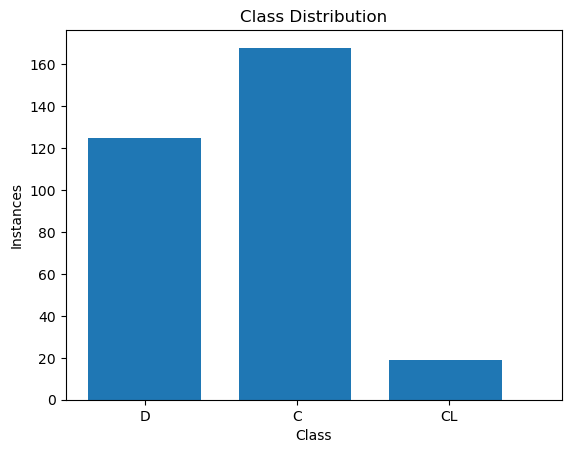

In [3]:
# Visualize class distribution

plt.hist(df['Status'], bins = 3, width =0.5 )
plt.xlabel('Class')
plt.ylabel('Instances')
plt.title('Class Distribution')
plt.xticks([0.25, 0.925, 1.6], ['D', 'C', 'CL'])




## Data preprocessing

### Imputing mean values to NAN

In [4]:
#nmbr of NAN
df.isnull().sum()

ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [5]:
#Select used features
df_selected = df[['ID', 'Status', 'Drug', 'Age', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
                  'Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT', 'Prothrombin']] 

#select columns with NAN values
df_nan = df[['Cholesterol', 'Platelets']]
df_imputed = df_nan

#impute mean to NAN values
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imp.fit(df_imputed[['Cholesterol', 'Platelets']])
df_imputed = mean_imp.transform(df_imputed[['Cholesterol', 'Platelets']])

# Create dataframe from the imputed columns
df_imputed = pd.DataFrame(df_imputed, columns = ['Cholesterol', 'Platelets'])

#Combine the dataframes
df = pd.concat([df_selected, df_imputed], axis = 1)

#check for NANs
df.isnull().sum()

ID              0
Status          0
Drug            0
Age             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
Bilirubin       0
Albumin         0
Alk_Phos        0
SGOT            0
Prothrombin     0
Cholesterol     0
Platelets       0
dtype: int64

In [6]:
df

,ID,Status,Drug,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Alk_Phos,SGOT,Prothrombin,Cholesterol,Platelets
0,1,D,D-penicillamine,21464.0,Y,Y,Y,Y,14.5,2.60,1718.0,137.95,12.2,261.0,190.0
1,2,C,D-penicillamine,20617.0,N,Y,Y,N,1.1,4.14,7394.8,113.52,10.6,302.0,221.0
2,3,D,D-penicillamine,25594.0,N,N,N,S,1.4,3.48,516.0,96.10,12.0,176.0,151.0
3,4,D,D-penicillamine,19994.0,N,Y,Y,S,1.8,2.54,6121.8,60.63,10.3,244.0,183.0
4,5,CL,Placebo,13918.0,N,Y,Y,N,3.4,3.53,671.0,113.15,10.9,279.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,C,D-penicillamine,22347.0,N,Y,N,N,0.4,3.58,797.0,91.00,10.4,246.0,288.0
308,309,C,Placebo,21294.0,N,N,N,N,0.4,2.75,1166.0,70.00,10.8,260.0,231.0
309,310,C,D-penicillamine,22767.0,N,N,N,N,1.7,3.35,1713.0,171.00,10.2,434.0,234.0
310,311,C,D-penicillamine,13879.0,N,N,N,N,2.0,3.16,1050.0,117.00,10.5,247.0,335.0


### One-Hot-Encoding and Scaling

In [7]:
#select data for encoding
#df_OHE = df[['Status','Ascites', 'Hepatomegaly', 'Spiders', 'Edema']]


#One hot encoding using dummies for categorical data
df_OHE = pd.get_dummies(df, columns = ['Status', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])
df_OHE.columns

Index(['ID', 'Drug', 'Age', 'Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT',
       'Prothrombin', 'Cholesterol', 'Platelets', 'Status_C', 'Status_CL',
       'Status_D', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N',
       'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S',
       'Edema_Y'],
      dtype='object')

In [8]:
#scale numerical data to reduce biases
#create scaler, fit and transform
df_scaler = df_OHE[['Age', 'Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT', 'Prothrombin','Cholesterol', 'Platelets']].values
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(df_scaler)
df_scaler = standard_scaler.transform(df_scaler)

#create dataframe from the scaled data
df_scaled = pd.DataFrame(df_scaler, columns = ['Age', 'Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT',
                                               'Prothrombin','Cholesterol', 'Platelets'])
df_categorical = df_OHE[['ID', 'Status_C', 'Status_CL',
       'Status_D', 'Drug', 'Ascites_N',
       'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N',
       'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y']] 
#concatenate with categorical data
df = pd.concat([df_categorical, df_scaled], axis = 1)



### Train test split with 5 fold cross validation

In [9]:
#5 fold cross validation
#Drop unnessesites
df.drop(['ID','Drug'], axis=1)


,Status_C,Status_CL,Status_D,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Age,Bilirubin,Albumin,Alk_Phos,SGOT,Prothrombin,Cholesterol,Platelets
0,False,False,True,False,True,False,True,False,True,False,False,True,0.827904,2.485914,-2.194559,-0.123847,0.271931,1.470371,-0.491215,-0.758492
1,True,False,False,True,False,False,True,False,True,True,False,False,0.608395,-0.476689,1.478942,2.532642,-0.159629,-0.125301,-0.305613,-0.431624
2,False,False,True,True,False,True,False,True,False,False,True,False,1.898239,-0.410362,-0.095416,-0.686329,-0.467356,1.270912,-0.876001,-1.169713
3,False,False,True,True,False,False,True,False,True,False,True,False,0.446938,-0.321927,-2.337683,1.936935,-1.093939,-0.424490,-0.568172,-0.832301
4,False,True,False,True,False,False,True,False,True,True,False,False,-1.127724,0.031817,0.023854,-0.613796,-0.166165,0.173887,-0.409731,-1.327875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,True,False,False,True,False,False,True,True,False,True,False,False,1.056743,-0.631452,0.143123,-0.554834,-0.557448,-0.324760,-0.559119,0.274832
308,True,False,False,True,False,True,False,True,False,True,False,False,0.783847,-0.631452,-1.836751,-0.382158,-0.928416,0.074158,-0.495742,-0.326183
309,True,False,False,True,False,True,False,True,False,True,False,False,1.165591,-0.344036,-0.405516,-0.126187,0.855765,-0.524219,0.291937,-0.294551
310,True,False,False,True,False,True,False,True,False,True,False,False,-1.137831,-0.277709,-0.858741,-0.436441,-0.098154,-0.225031,-0.554592,0.770406


## Model building

In [10]:
# Model building, training and testing with 5 fold cross validation

# Split data to targets and features
X = df[['Age', 'Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT', 'Prothrombin','Cholesterol', 'Platelets','Ascites_N', 'Ascites_Y',
        'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y']]
y = df[['Status_C','Status_D','Status_CL']]

# Create classifier
rfclf = RandomForestClassifier(min_samples_leaf =  1, min_samples_split =  2, n_estimators = 300)

# Cross val predictions
k =5
y_pred = cross_val_predict(rfclf, X, y, cv=k)


## Grid search for best parameters

## Evaluation and results

In [11]:
# Calculate the roc auc scores
roc_auc_scores = []
for i in range(3):
    roc_auc = roc_auc_score(y.iloc[:, i], y_pred[:, i])
    roc_auc_scores.append(roc_auc)

# Print ROC AUC score for each class
for i, roc_auc in enumerate(roc_auc_scores):
    print(f"ROC AUC Score for class {i}: {roc_auc}")

# Calculate confusion matrix of each class
conf_mats = [confusion_matrix(y.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]

# Calculate concatenated confusion matrix
overall_conf_mat = np.sum(conf_mats, axis=0)

# Print confusion matrix and accuracy of each class
for i, conf_mat in enumerate(conf_mats):
    
    accuracy = np.trace(conf_mat) / np.sum(conf_mat)
    recall = conf_mats[i][0][0]/(conf_mats[i][0][0]+conf_mats[i][0][1])
    print("recall", recall)
    print("accuracy:", accuracy)
    print(f"Confusion matrix for label {y.columns[i]}:")
    print(conf_mat)

# Print the concatenated confusion matrix
print("Overall Confusion Matrix:")
print(overall_conf_mat)

# Calculate and print the mean accuracy of the cross-validation
accuracy = np.trace(overall_conf_mat) / np.sum(overall_conf_mat)
recall = overall_conf_mat[0][0]/(overall_conf_mat[0][0]+overall_conf_mat[0][1])
print("Mean accuracy:", accuracy)
print("Mean recall:", recall)


ROC AUC Score for class 0: 0.785218253968254
ROC AUC Score for class 1: 0.7398288770053476
ROC AUC Score for class 2: 0.5
recall 0.7430555555555556
accuracy: 0.7884615384615384
Confusion matrix for label Status_C:
[[107  37]
 [ 29 139]]
recall 0.8716577540106952
accuracy: 0.7660256410256411
Confusion matrix for label Status_D:
[[163  24]
 [ 49  76]]
recall 1.0
accuracy: 0.9391025641025641
Confusion matrix for label Status_CL:
[[293   0]
 [ 19   0]]
Overall Confusion Matrix:
[[563  61]
 [ 97 215]]
Mean accuracy: 0.8311965811965812
Mean recall: 0.9022435897435898


### Visualization

[0.         0.25694444 1.        ]
[0.         0.12834225 1.        ]
[0. 1.]


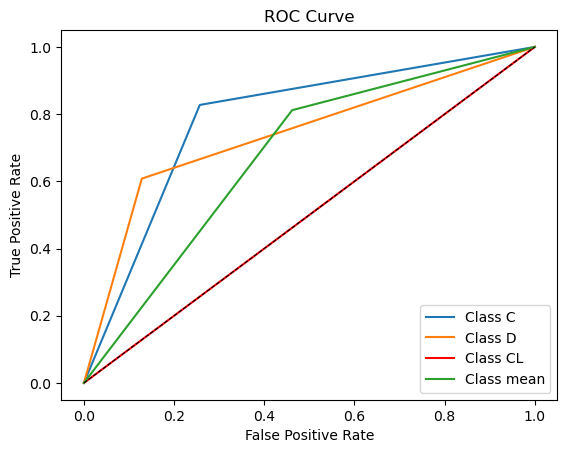

In [13]:
# Plot ROC curve for each class and mean
fpr_comb = []
tpr_comb = []

for i in range(3):
    fpr, tpr, _ = roc_curve(y.iloc[:, i], y_pred[:, i])
    print(fpr) 
    fpr_comb.append(fpr)
    tpr_comb.append(tpr)
    if i  == 0:
        plt.plot(fpr, tpr, label='Class C')
    if i == 1:
        plt.plot(fpr, tpr, label='Class D')
    if i == 2:
        plt.plot(fpr, tpr, label ='Class CL', color = 'red')

fpr_mean = (fpr_comb[0][1]+fpr_comb[1][1]+fpr_comb[2][1])/3
tpr_mean = (tpr_comb[0][1]+tpr_comb[1][1]+tpr_comb[2][1])/3

fpr_curve_mean = [0, fpr_mean, 1]
tpr_curve_mean = [0, tpr_mean, 1]

plt.plot(fpr_curve_mean, tpr_curve_mean, label = 'Class mean')
plt.plot([0, 1], [0,1], '--', color = 'black', linewidth = 0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
